<a href="https://colab.research.google.com/github/zunaed/CS_687_DeepLearningCourse/blob/main/HW3_VGGnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow.keras 
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint 
from tensorflow.keras.applications.resnet50 import ResNet50 
import numpy as np 
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt 
%matplotlib inline 
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [6]:
#mount data 
from google.colab import drive
drive.mount('/content/gdrive')

from zipfile import ZipFile
!ls gdrive/MyDrive
!unzip gdrive/MyDrive/Small_set_cats_vs_dogs.zip

Mounted at /content/gdrive
 AA222-Lecture3.pdf
 Answer_of_5_python_code_PrithulSarker.ipynb
'Assignment 2_Presentation_Group 1 (1).gslides'
 Attendance.gsheet
'Attendance Section 4 week 4.gsheet'
'Attendance Section 4 week 4.xlsx'
 Austin_hw10.pdf
 bankstatments
 bin2vector.m
 chp9_2ctl.asv
 Code_NNCOntrol
'Colab Notebooks'
 computedtrqwthgaitdatawithseparatenonlinearblock
 Cricketclubgraduatemembers.xlsx
 CS487.687-main
 Dec0211.zip
 Deep_Learning_ALiReza_CS
'Document_3_fig (1).rtf'
 Document_3_fig.pdf
 Document_3_fig.rtf
 Document_withfigures.rtf
 DSC_0986.jpg
 DSC_0987.jpg
 DSC_0988.jpg
 edit
 edited
 EE220L
'EE220LFinal Exam Fall 2020'
 EE621
 equationforsaber.docx
 figure.rtf
 gait
 gait_mar_16
'Getting started.pdf'
'GTP Access Code Zunaed Kibria.pdf'
 H-K-Khalil-Nonlinear-Systems-3rd-Edition-2002.pdf
 hw11.m
 hw11.pdf
 HW3_VGGnet.ipynb
'IEEEtranscation on neural network'
 Images
 imagesgait
 Journal_ZunaedKibria
'Lab Appointment EE 220L  .gsheet'
'Lab Notes ONLY TA NOT FOR STUDEN

In [26]:
epochs = 150 
batch_size = 8 
training_samples = 200 
validation_samples = 400 
img_width = 200 
img_height = 200 
channeles = 3
input_shape = (img_width,img_height,3)

In [8]:
train_data_dir = 'Small_set_cats_vs_dogs/train'
validation_data_dir = 'Small_set_cats_vs_dogs/val'
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.4,
    zoom_range = 0.4,
    rotation_range =20,
    width_shift_range = 0.4,
    height_shift_range=0.4, 
    horizontal_flip = True,
    vertical_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)
print("Trainning Images...")
train_generator = train_datagen.flow_from_directory(
    train_data_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode = 'binary'
)


print("Validation Images...")
validation_generator = val_datagen.flow_from_directory (
    validation_data_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode ='binary'
)

Trainning Images...
Found 4000 images belonging to 2 classes.
Validation Images...
Found 600 images belonging to 2 classes.


In [7]:
model = tensorflow.keras.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(1024, activation='relu', kernel_initializer = 'he_uniform'))
model.add(layers.Dense(512, activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.5))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 128)       7

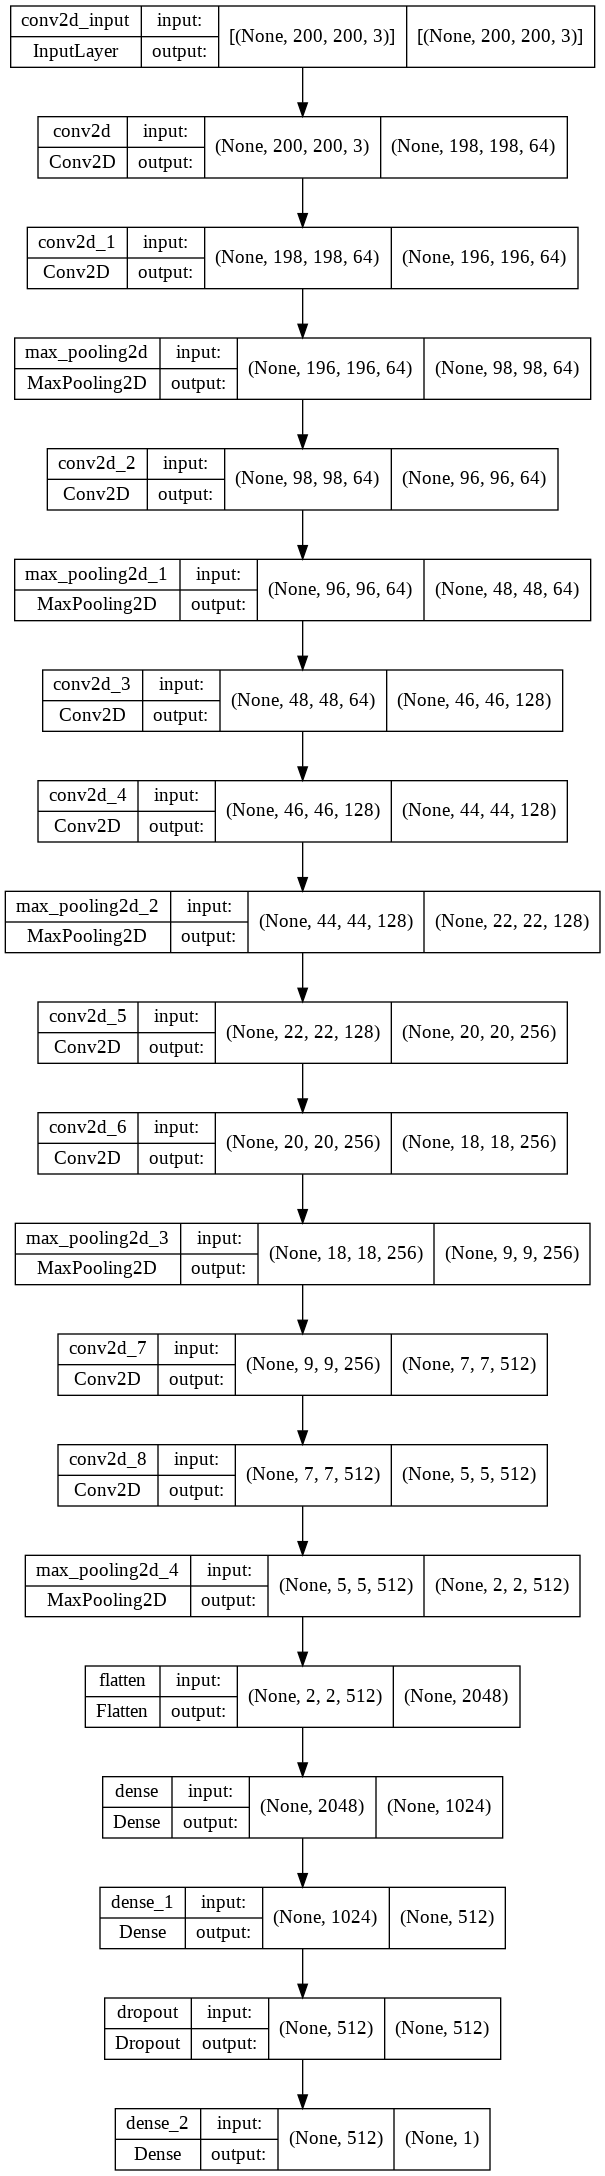

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='vgg_lite_model.png', show_shapes=True, show_layer_names=True)

In [11]:
# 5. (d) Model Training
optimizer = SGD(learning_rate = 0.0001, momentum = 0.9)
#optimizer = RMSprop(learning_rate = 0.0001)
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5, verbose = 0,
                              mode = 'auto', min_delta = 0.0001, cooldown = 0, min_lr = 0)
snapshot_name = 'vgg_lite_model'
checkpoint = ModelCheckpoint(filepath = snapshot_name + ".{epoch:02d}-{val_accuracy:.2f}.h5",
                             monitor = 'val_accuracy', verbose = 0, save_best_only = True,
                             save_weights_only = True, mode = 'auto')

In [12]:
history = model.fit(train_generator, steps_per_epoch = training_samples // batch_size,
                                  epochs = epochs, validation_data = validation_generator, 
                                  validation_steps = validation_samples // batch_size,
                                  callbacks = [reduce_lr, checkpoint])

Epoch 1/200
25/25 [==============================] - 18s 251ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500 - lr: 1.0000e-04
Epoch 2/200
25/25 [==============================] - 6s 239ms/step - loss: 0.6929 - accuracy: 0.5300 - val_loss: 0.6932 - val_accuracy: 0.5175 - lr: 1.0000e-04
Epoch 3/200
25/25 [==============================] - 6s 236ms/step - loss: 0.6931 - accuracy: 0.5200 - val_loss: 0.6931 - val_accuracy: 0.5175 - lr: 1.0000e-04
Epoch 4/200
25/25 [==============================] - 6s 239ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.4850 - lr: 1.0000e-04
Epoch 5/200
25/25 [==============================] - 6s 241ms/step - loss: 0.6919 - accuracy: 0.5700 - val_loss: 0.6932 - val_accuracy: 0.4925 - lr: 1.0000e-04
Epoch 6/200
25/25 [==============================] - 6s 239ms/step - loss: 0.6939 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5025 - lr: 1.0000e-04
Epoch 7/200
25/25 [====================

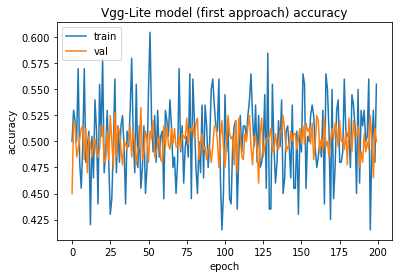

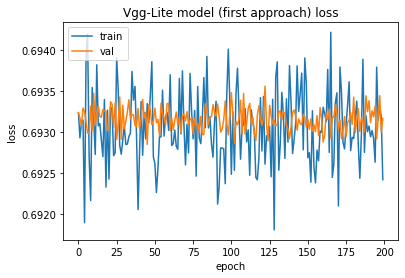

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Vgg-Lite model (first approach) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Vgg-Lite model (first approach) loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
model2 = tensorflow.keras.Sequential()
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(512, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(layers.Dense(1024, activation='relu', kernel_initializer = 'he_uniform'))
model2.add(layers.Dense(512, activation='relu', kernel_initializer = 'he_uniform'))
model2.add(Dropout(0.5))
model2.add(layers.Dense(units = 1, activation = 'softmax'))

In [10]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 128)      

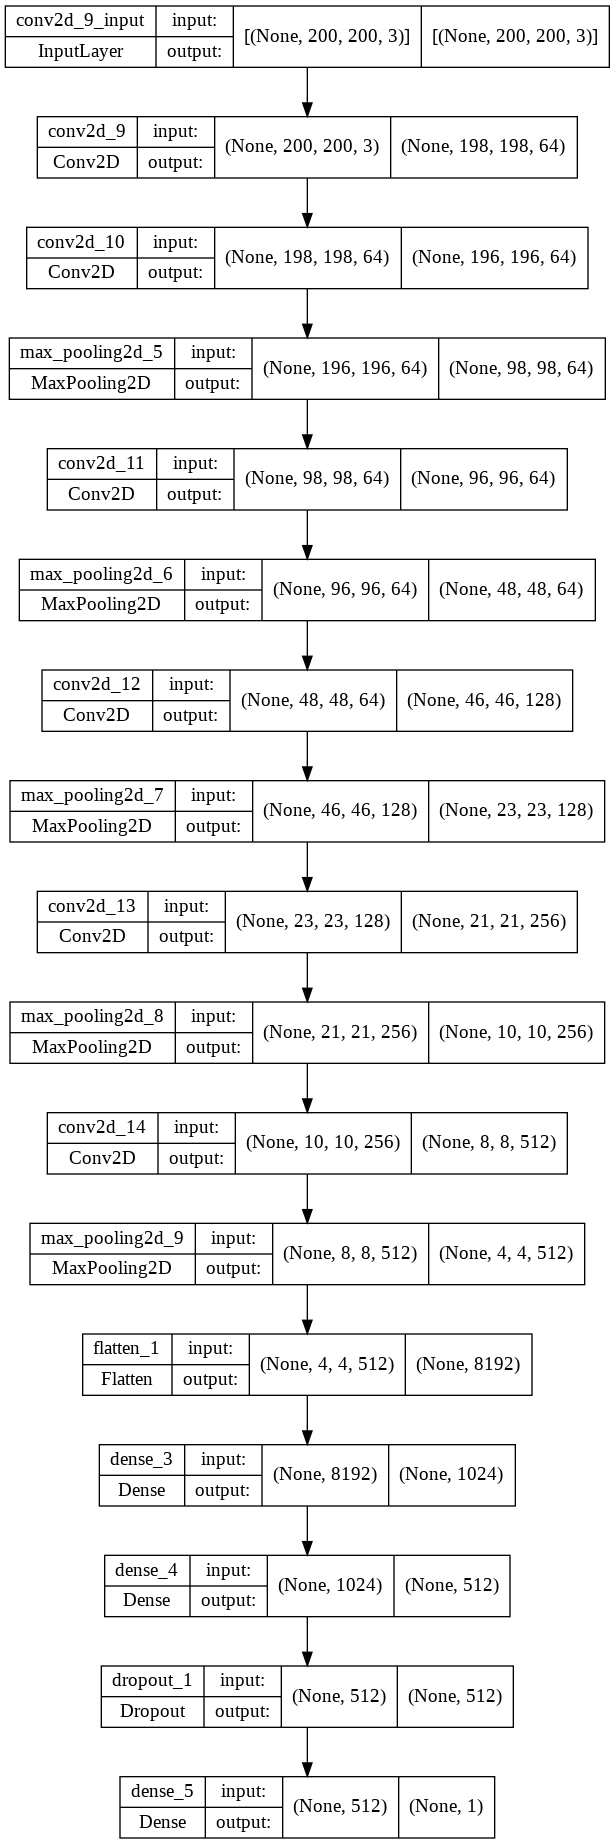

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='vgg_lite_model2.png', show_shapes=True, show_layer_names=True)

In [18]:
# 5. (d) Model Training
optimizer = SGD(learning_rate = 0.0001, momentum = 0.9)
#optimizer = RMSprop(learning_rate = 0.0001)
model2.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5, verbose = 0,
                              mode = 'auto', min_delta = 0.0001, cooldown = 0, min_lr = 0)
snapshot_name = 'vgg_lite_model2'
checkpoint = ModelCheckpoint(filepath = snapshot_name + ".{epoch:02d}-{val_accuracy:.2f}.h5",
                             monitor = 'val_accuracy', verbose = 0, save_best_only = True,
                             save_weights_only = True, mode = 'auto')

In [19]:
history = model2.fit(train_generator, steps_per_epoch = training_samples // batch_size,
                                  epochs = epochs, validation_data = validation_generator, 
                                  validation_steps = validation_samples // batch_size,
                                  callbacks = [reduce_lr, checkpoint])

Epoch 1/200
25/25 [==============================] - 11s 408ms/step - loss: 0.6908 - accuracy: 0.5400 - val_loss: 0.6930 - val_accuracy: 0.4900 - lr: 1.0000e-04
Epoch 2/200
25/25 [==============================] - 6s 250ms/step - loss: 0.6940 - accuracy: 0.5150 - val_loss: 0.6930 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/200
25/25 [==============================] - 6s 227ms/step - loss: 0.6936 - accuracy: 0.4700 - val_loss: 0.6929 - val_accuracy: 0.5250 - lr: 1.0000e-04
Epoch 4/200
25/25 [==============================] - 5s 221ms/step - loss: 0.6941 - accuracy: 0.4850 - val_loss: 0.6933 - val_accuracy: 0.4725 - lr: 1.0000e-04
Epoch 5/200
25/25 [==============================] - 6s 221ms/step - loss: 0.6932 - accuracy: 0.5200 - val_loss: 0.6931 - val_accuracy: 0.4875 - lr: 1.0000e-04
Epoch 6/200
25/25 [==============================] - 5s 217ms/step - loss: 0.6948 - accuracy: 0.4700 - val_loss: 0.6934 - val_accuracy: 0.4800 - lr: 1.0000e-04
Epoch 7/200
25/25 [====================

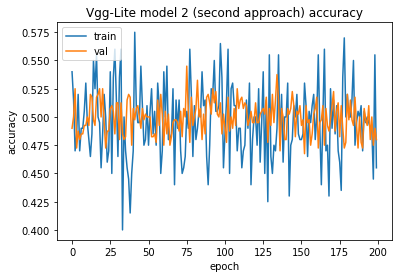

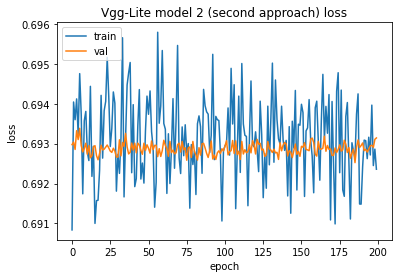

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Vgg-Lite model 2 (second approach) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Vgg-Lite model 2 (second approach) loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
model3 = tensorflow.keras.Sequential()
model3.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=(img_height, img_width, 3)))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3),padding = 'same', activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(256, (3, 3),padding = 'same', activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(layers.Dense(1024, activation='relu', kernel_initializer = 'he_uniform'))
model3.add(layers.Dense(512, activation='relu', kernel_initializer = 'he_uniform'))
model3.add(Dropout(0.5))
model3.add(layers.Dense(units = 1, activation = 'sigmoid'))

In [23]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 200, 200, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 100, 100, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                      

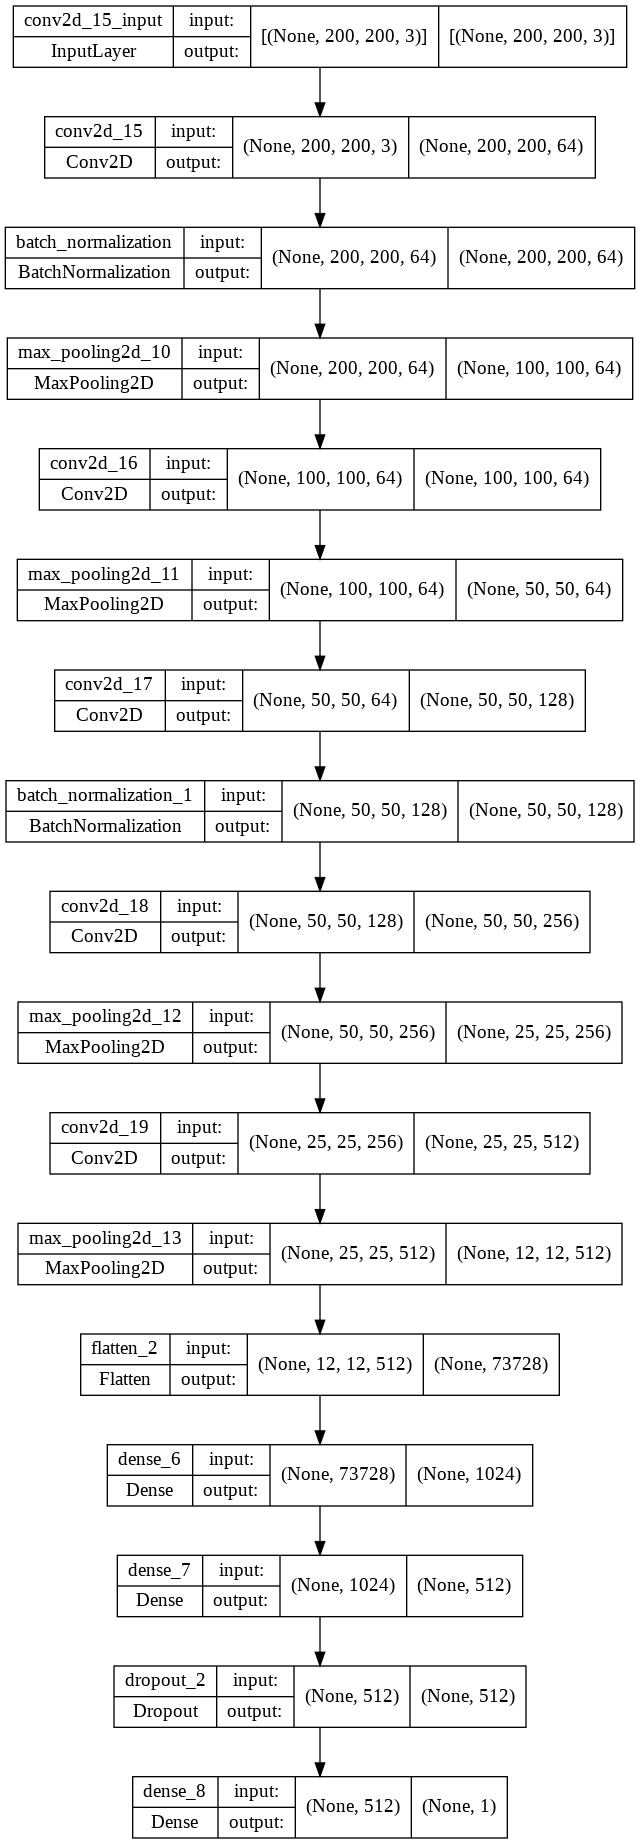

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model3, to_file='vgg_lite_model3.png', show_shapes=True, show_layer_names=True)

In [25]:
# 5. (d) Model Training
#optimizer = SGD(learning_rate = 0.0001, momentum = 0.9)
#optimizer = RMSprop(learning_rate = 0.0001)
optimizer = Adam(learning_rate = 0.0001)
model3.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5, verbose = 0,
                              mode = 'auto', min_delta = 0.0001, cooldown = 0, min_lr = 0)
snapshot_name = 'vgg_lite_model3'
checkpoint = ModelCheckpoint(filepath = snapshot_name + ".{epoch:02d}-{val_accuracy:.2f}.h5",
                             monitor = 'val_accuracy', verbose = 0, save_best_only = True,
                             save_weights_only = True, mode = 'auto')

In [27]:
history = model3.fit(train_generator, steps_per_epoch = training_samples // batch_size,
                                  epochs = epochs, validation_data = validation_generator, 
                                  validation_steps = validation_samples // batch_size,
                                  callbacks = [reduce_lr, checkpoint])

Epoch 1/150
25/25 [==============================] - 9s 278ms/step - loss: 1.7172 - accuracy: 0.4950 - val_loss: 0.6930 - val_accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/150
25/25 [==============================] - 6s 221ms/step - loss: 0.7022 - accuracy: 0.4850 - val_loss: 0.6933 - val_accuracy: 0.4825 - lr: 1.0000e-04
Epoch 3/150
25/25 [==============================] - 5s 215ms/step - loss: 0.6903 - accuracy: 0.5450 - val_loss: 0.6930 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 4/150
25/25 [==============================] - 5s 220ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.4725 - lr: 1.0000e-04
Epoch 5/150
25/25 [==============================] - 6s 248ms/step - loss: 0.6793 - accuracy: 0.5150 - val_loss: 0.6926 - val_accuracy: 0.5050 - lr: 1.0000e-04
Epoch 6/150
25/25 [==============================] - 5s 221ms/step - loss: 0.7170 - accuracy: 0.4600 - val_loss: 0.6948 - val_accuracy: 0.5050 - lr: 1.0000e-04
Epoch 7/150
25/25 [=====================

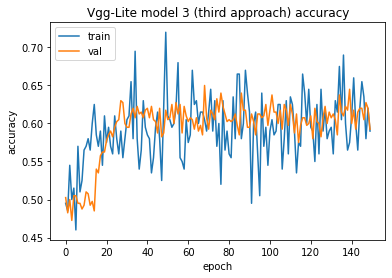

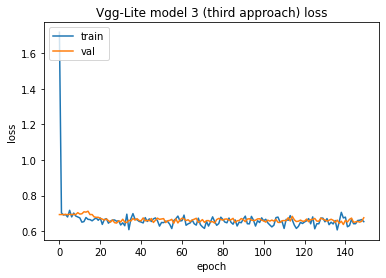

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Vgg-Lite model 3 (third approach) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Vgg-Lite model 3 (third approach) loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
# 5.(h)
# AlexNet
model_alex = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [39]:
model_alex.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 96)        34944     
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 23, 23, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 batch_normalization_3 (Batc  (None, 23, 23, 256)      1024      
 hNormalization)                                                 
                                                      

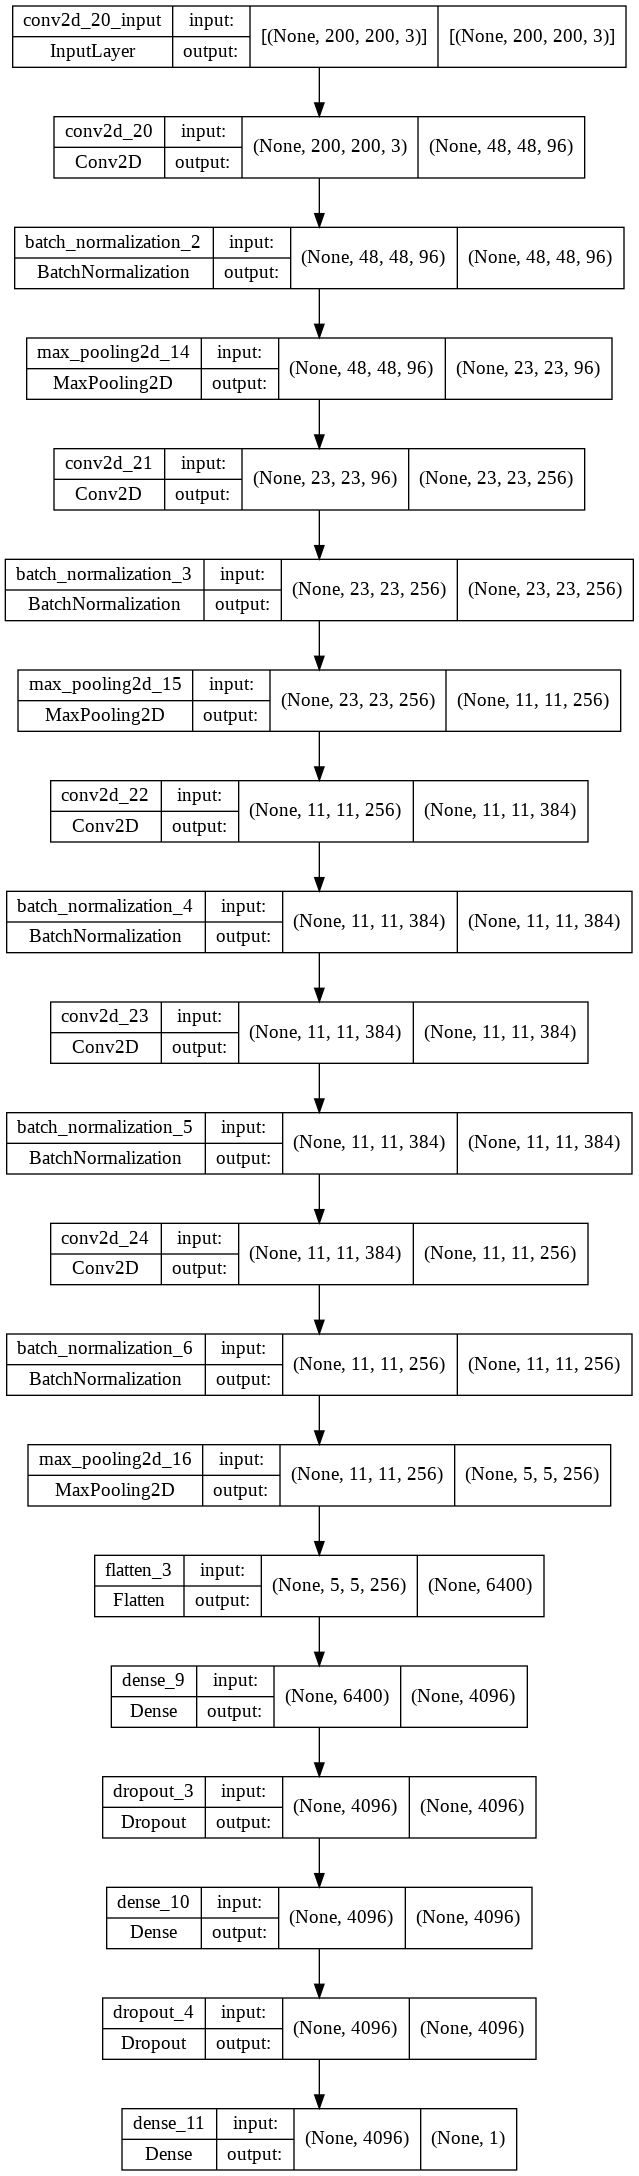

In [40]:
plot_model(model_alex, to_file='alex_model.png', show_shapes=True, show_layer_names=True)

In [32]:
model_alex.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
optimizer = Adam(learning_rate = 0.0001)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5, verbose = 2,
                              mode = 'auto', min_delta = 0.0001, cooldown = 0, min_lr = 0)
snapshot_name = 'alex_image_model'
checkpoint = ModelCheckpoint(filepath = snapshot_name + ".{epoch:02d}-{val_accuracy:.2f}.h5",
                             monitor = 'val_accuracy', verbose = 0, save_best_only = True,
                             save_weights_only = True, mode = 'auto')

In [33]:
history = model_alex.fit(train_generator, steps_per_epoch = training_samples // batch_size,
                                  epochs = epochs, validation_data = validation_generator, 
                                  validation_steps = validation_samples // batch_size,
                                  callbacks = [reduce_lr, checkpoint])

model_alex.save_weights('model_alex_final.h5')

Epoch 1/150
25/25 [==============================] - 7s 209ms/step - loss: 1.2155 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.4800 - lr: 1.0000e-29
Epoch 2/150
25/25 [==============================] - 5s 186ms/step - loss: 1.3506 - accuracy: 0.4900 - val_loss: 0.6913 - val_accuracy: 0.5225 - lr: 1.0000e-29
Epoch 3/150
25/25 [==============================] - 4s 175ms/step - loss: 1.3776 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.4975 - lr: 1.0000e-29
Epoch 4/150
25/25 [==============================] - 6s 228ms/step - loss: 1.2519 - accuracy: 0.4900 - val_loss: 0.6948 - val_accuracy: 0.4850 - lr: 1.0000e-29
Epoch 5/150
25/25 [==============================] - 5s 197ms/step - loss: 1.2853 - accuracy: 0.5300 - val_loss: 0.6920 - val_accuracy: 0.5125 - lr: 1.0000e-29
Epoch 6/150
25/25 [==============================] - 5s 191ms/step - loss: 1.1628 - accuracy: 0.5250 - val_loss: 0.6884 - val_accuracy: 0.5425 - lr: 1.0000e-29
Epoch 7/150
25/25 [=====================

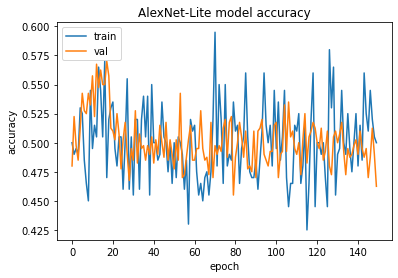

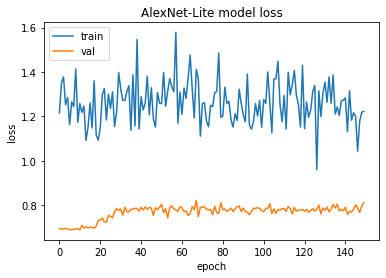

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('AlexNet-Lite model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('AlexNet-Lite model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()